# Digits Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Digits Dataset as an example.

## Import Libraries

In [1]:
import numpy as np
## Data processing
from sklearn.datasets import load_digits
## Data visualization
import matplotlib.pyplot as plt

# Import our library
import os
os.chdir('..')
from apenet.nn.models.mlp import MLP
from apenet.utils.data import train_test_split, standardize
from apenet.nn.loss import CrossEntropyLoss
from apenet.nn.optim import SGD
from apenet.eye.history import plot_history


## Set Random Generator

In [2]:
seed = 42
rng = np.random.default_rng(seed=seed)

# Data Overview

## Load and Preprocess Data


In [3]:
dataset = load_digits()
X = dataset.data
y = dataset.target

## Data Visualization

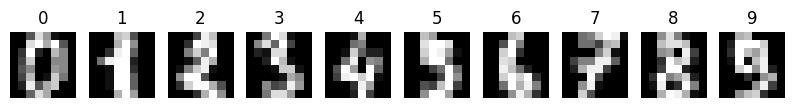

In [4]:
# Visualize some examples from the dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(dataset.images[i], cmap='gray')
    ax.set_title(dataset.target[i])
    ax.axis('off')
plt.show()

## Data Preprocessing


In [5]:
# Standardize features
X = standardize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rng=rng)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: (1438, 64)
Test dataset size: (359, 64)


# Model Overview

## Create Model


In [6]:
model = MLP(
    input_size=X_train.shape[1],
    hidden_sizes=[64, 32],
    output_size=10,
    hidden_activation='tanh',
    output_activation=None,
    initializer='Xavier',
    rng=rng
)

# Architecture hyperparameters
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
hidden_sizes = [32, 16]

model = MLP(
    input_size=input_size,
    output_size=num_classes,
    hidden_sizes=hidden_sizes,
    initializer='He',
    hidden_activation='tanh',
    output_activation=None,
    rng=rng
)

# Training hyperparameters
learning_rate = 0.01
epochs = 100
batch_size = 16

## Define Loss Function and Optimizer


In [7]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.get_parameters(), learning_rate=learning_rate)

## Train Model


In [8]:
history = model.fit(
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=epochs,
    batch_size=batch_size,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)

Epoch 1/100: train_loss=2.1764, train_acc=0.2962, val_loss=1.9503, val_acc=0.4290
Epoch 10/100: train_loss=0.8736, train_acc=0.8032, val_loss=0.8421, val_acc=0.8106
Epoch 20/100: train_loss=0.4772, train_acc=0.9179, val_loss=0.4917, val_acc=0.9136


/Users/flsoorian/code/apenet/apenet/nn/layer.py:78: RuntimeWarning: divide by zero encountered in matmul
  return x @ self.parameters['W'] + self.parameters['b']
/Users/flsoorian/code/apenet/apenet/nn/layer.py:78: RuntimeWarning: overflow encountered in matmul
  return x @ self.parameters['W'] + self.parameters['b']
/Users/flsoorian/code/apenet/apenet/nn/layer.py:78: RuntimeWarning: invalid value encountered in matmul
  return x @ self.parameters['W'] + self.parameters['b']
/Users/flsoorian/code/apenet/apenet/nn/layer.py:96: RuntimeWarning: divide by zero encountered in matmul
  self.gradients['dW'] = (A_prev.T @ dZ) / m
/Users/flsoorian/code/apenet/apenet/nn/layer.py:96: RuntimeWarning: overflow encountered in matmul
  self.gradients['dW'] = (A_prev.T @ dZ) / m
/Users/flsoorian/code/apenet/apenet/nn/layer.py:96: RuntimeWarning: invalid value encountered in matmul
  self.gradients['dW'] = (A_prev.T @ dZ) / m
/Users/flsoorian/code/apenet/apenet/nn/layer.py:99: RuntimeWarning: divide by 

Epoch 30/100: train_loss=0.3076, train_acc=0.9576, val_loss=0.3478, val_acc=0.9304
Epoch 40/100: train_loss=0.2194, train_acc=0.9736, val_loss=0.2781, val_acc=0.9471
Epoch 50/100: train_loss=0.1673, train_acc=0.9819, val_loss=0.2382, val_acc=0.9499
Epoch 60/100: train_loss=0.1338, train_acc=0.9854, val_loss=0.2133, val_acc=0.9554
Epoch 70/100: train_loss=0.1105, train_acc=0.9889, val_loss=0.1959, val_acc=0.9582
Epoch 80/100: train_loss=0.0933, train_acc=0.9924, val_loss=0.1833, val_acc=0.9610
Epoch 90/100: train_loss=0.0801, train_acc=0.9937, val_loss=0.1738, val_acc=0.9610
Epoch 100/100: train_loss=0.0697, train_acc=0.9958, val_loss=0.1665, val_acc=0.9610


## Evaluate Model


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, loss_fn=loss_fn)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1665, Test Accuracy: 0.9610


## Plot Training History


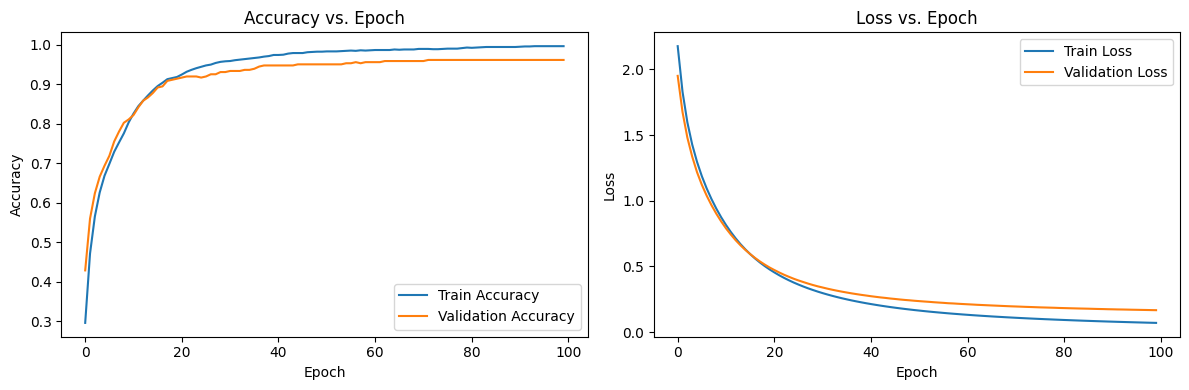

In [10]:
plot_history(history)